This notebook was run on google colab, due to errors on my local computer

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [28]:

link = "https://drive.google.com/file/d/1GphUNTTJDsxrDUaQaJztZMhZHvyW__Oc/view?usp=sharing"
import pandas as pd
import numpy as np
# paths of file
# id = link.split("/")[-2] 
  
# downloaded = drive.CreateFile({'id':id})  
# downloaded.GetContentFile('xclara.csv')   
  
# particles = pd.read_csv('xclara.csv') 
particles = pd.read_csv("./only_j.csv")



# we convert E and pt to log of their own values
particles['E'] = np.log10(particles['E'])
particles['pt'] = np.log10(particles['pt'])
particles['eta'] /= 5
particles['phi'] /= 3
print(particles.head())
particles.describe()
particles.dtypes


          E        pt       eta       phi
0  5.412833  5.386811  0.065792  0.750047
1  5.716080  5.035790 -0.449460 -0.618930
2  5.583226  4.946480  0.429032 -0.652117
3  4.596681  4.548575  0.094092 -0.388150
4  5.353012  4.429400 -0.563216 -0.753127


E      float64
pt     float64
eta    float64
phi    float64
dtype: object

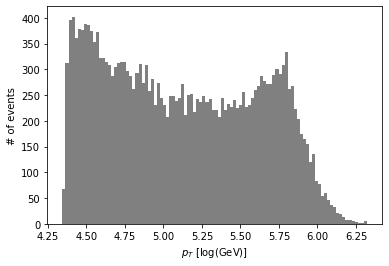

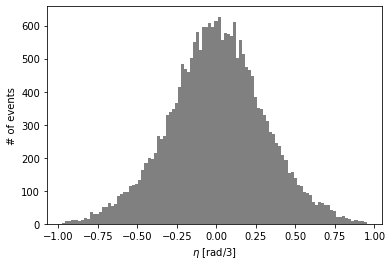

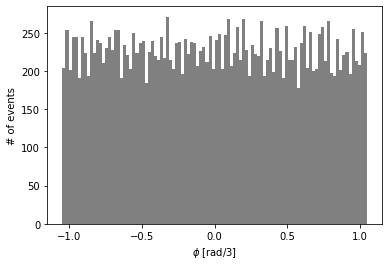

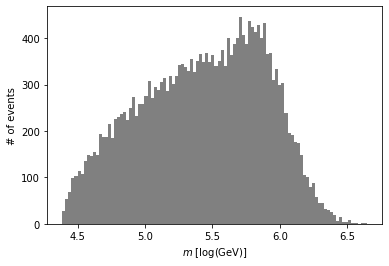

In [29]:
import matplotlib.pyplot as plt

unit_list = ['[log(GeV)]', '[rad/3]', '[rad/3]', '[log(GeV)]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$m$']

branches=["pt","eta","phi","E"]

n_bins = 100

for kk in range(0,4):
    n_hist_data, bin_edges, _ = plt.hist(particles[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('# of events')
    #plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

In [30]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(particles, test_size=0.2)

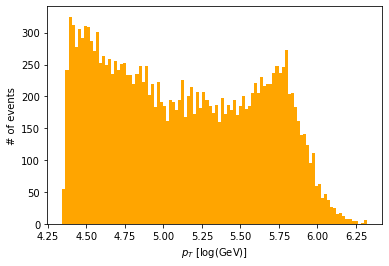

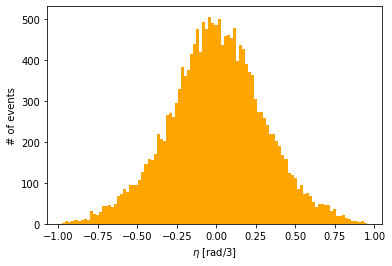

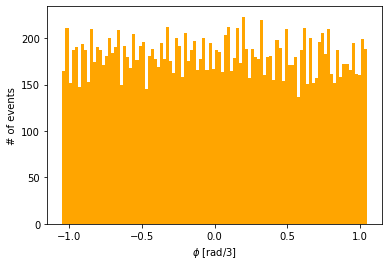

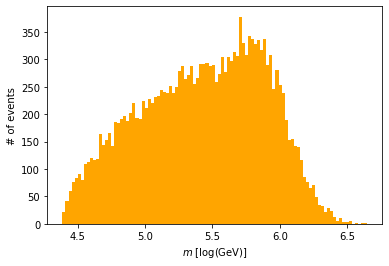

In [31]:
unit_list = ['[log(GeV)]', '[rad/3]', '[rad/3]', '[log(GeV)]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$m$']

branches=["pt","eta","phi","E"]

n_bins = 100

for kk in range(0,4):
    n_hist_data, bin_edges, _ = plt.hist(train[branches[kk]], color='orange', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('# of events')
    #plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

We try running a similar model to the one given originally, but use binary crossentropy as the loss function, and use a sigmoid function on the last layer


In [32]:

input_size = 4
hidden_size = 200
hidden_size2 = 20
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(input_img)
hidden_2 = layers.Dense(hidden_size2, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)
hidden_3 = layers.Dense(hidden_size2, activation='relu')(code)
hidden_4 = layers.Dense(hidden_size, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='sigmoid')(hidden_4)

autoencoder = keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train, train, epochs=100)

Epoch 1/100
567/567 [==============================] - 1s 2ms/step - loss: -47043552.4071
Epoch 2/100
567/567 [==============================] - 1s 2ms/step - loss: -20977384794.5915
Epoch 3/100
567/567 [==============================] - 1s 2ms/step - loss: -497838939525.4084
Epoch 4/100
567/567 [==============================] - 1s 2ms/step - loss: -3505141148715.2676
Epoch 5/100
567/567 [==============================] - 1s 2ms/step - loss: -13803454292314.1406
Epoch 6/100
567/567 [==============================] - 1s 2ms/step - loss: -39036949745029.4062
Epoch 7/100
567/567 [==============================] - 1s 2ms/step - loss: -90392691182750.6406
Epoch 8/100
567/567 [==============================] - 1s 2ms/step - loss: -181605653508038.3125
Epoch 9/100
567/567 [==============================] - 1s 2ms/step - loss: -330137508788656.6875
Epoch 10/100
567/567 [==============================] - 1s 2ms/step - loss: -556700516667680.4375
Epoch 11/100
567/567 [==========================

In [33]:
results = autoencoder.evaluate(test, test)
print("test loss, test acc:", results)

142/142 [==============================] - 0s 927us/step - loss: -40397851607466770432.0000
test loss, test acc: -4.039785160746677e+19


Error seems big XD

Now we try a model with epoch = 100, loss function = MSE, and with last layer using sigmoid

In [34]:
input_size = 4
hidden_size = 200
hidden_size2 = 20
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(input_img)
hidden_2 = layers.Dense(hidden_size2, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)
hidden_3 = layers.Dense(hidden_size2, activation='relu')(code)
hidden_4 = layers.Dense(hidden_size, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='sigmoid')(hidden_4)

autoencoder = keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.fit(train, train, epochs=100)

Epoch 1/100
567/567 [==============================] - 1s 2ms/step - loss: 9.7030
Epoch 2/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3400
Epoch 3/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3126
Epoch 4/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3203
Epoch 5/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3241
Epoch 6/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3151
Epoch 7/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3340
Epoch 8/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3215
Epoch 9/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3375
Epoch 10/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3077
Epoch 11/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3086
Epoch 12/100
567/567 [==============================] - 1s 2ms/step - loss: 9.3103
Epoch 13/100


In [35]:
results = autoencoder.evaluate(test, test)
print("test loss, test acc:", results)

142/142 [==============================] - 0s 942us/step - loss: 9.2898
test loss, test acc: 9.28978443145752


Now we try a model with epoch = 100, loss function = MSE, and with last layer NOT using sigmoid

In [36]:
input_size = 4
hidden_size = 200
hidden_size2 = 20
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(input_img)
hidden_2 = layers.Dense(hidden_size2, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)
hidden_3 = layers.Dense(hidden_size2, activation='relu')(code)
hidden_4 = layers.Dense(hidden_size, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='relu')(hidden_4)

autoencoder = keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.fit(train, train, epochs=100)

Epoch 1/100
567/567 [==============================] - 1s 2ms/step - loss: 7.3053
Epoch 2/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7351
Epoch 3/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7258
Epoch 4/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7396
Epoch 5/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7356
Epoch 6/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7452
Epoch 7/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7205
Epoch 8/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7412
Epoch 9/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7259
Epoch 10/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7432
Epoch 11/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7205
Epoch 12/100
567/567 [==============================] - 1s 2ms/step - loss: 6.7389
Epoch 13/100


In [37]:
results = autoencoder.evaluate(test, test)
print("test loss, test acc:", results)

142/142 [==============================] - 0s 910us/step - loss: 6.7122
test loss, test acc: 6.712226390838623


Now we try a model with epoch = 100, loss function = binary crossover, and with last layer NOT using sigmoid

In [38]:
input_size = 4
hidden_size = 200
hidden_size2 = 20
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(input_img)
hidden_2 = layers.Dense(hidden_size2, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)
hidden_3 = layers.Dense(hidden_size2, activation='relu')(code)
hidden_4 = layers.Dense(hidden_size, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='relu')(hidden_4)

autoencoder = keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train, train, epochs=100)

Epoch 1/100
567/567 [==============================] - 1s 2ms/step - loss: -16.6846
Epoch 2/100
567/567 [==============================] - 1s 2ms/step - loss: -32.5639
Epoch 3/100
567/567 [==============================] - 1s 2ms/step - loss: -32.6665
Epoch 4/100
567/567 [==============================] - 1s 2ms/step - loss: -32.5948
Epoch 5/100
567/567 [==============================] - 1s 2ms/step - loss: -32.6020
Epoch 6/100
567/567 [==============================] - 1s 2ms/step - loss: -32.5327
Epoch 7/100
567/567 [==============================] - 1s 2ms/step - loss: -32.5888
Epoch 8/100
567/567 [==============================] - 1s 2ms/step - loss: -32.6204
Epoch 9/100
567/567 [==============================] - 1s 2ms/step - loss: -32.6317
Epoch 10/100
567/567 [==============================] - 1s 2ms/step - loss: -32.5988
Epoch 11/100
567/567 [==============================] - 1s 2ms/step - loss: -32.6356
Epoch 12/100
567/567 [==============================] - 1s 2ms/step - loss

In [39]:
results = autoencoder.evaluate(test, test, batch_size=128)
print("test loss, test acc:")
print(results)

36/36 [==============================] - 0s 1ms/step - loss: -32.5214
test loss, test acc:
-32.52143478393555


We now try to increase the number of epochs to 200, in a model that doesnt use sigmoid and uses MSE as the loss function. We will ditch binary_crossover for now

In [40]:
input_size = 4
hidden_size = 200
hidden_size2 = 20
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(input_img)
hidden_2 = layers.Dense(hidden_size2, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)
hidden_3 = layers.Dense(hidden_size2, activation='relu')(code)
hidden_4 = layers.Dense(hidden_size, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='relu')(hidden_4)

autoencoder = keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.fit(train, train, epochs=200)

Epoch 1/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1864
Epoch 2/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1232
Epoch 3/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1188
Epoch 4/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1298
Epoch 5/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1432
Epoch 6/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1475
Epoch 7/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1358
Epoch 8/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1725
Epoch 9/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1344
Epoch 10/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1475
Epoch 11/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1570
Epoch 12/200
567/567 [==============================] - 1s 2ms/step - loss: 14.1498
E

In [41]:
results = autoencoder.evaluate(test, test, batch_size=64)
print("test loss, test acc:")
print(results)

36/36 [==============================] - 0s 1ms/step - loss: 14.1158
test loss, test acc:
14.115814208984375


As the error we get for 200 epoch is more than the error we get for 100 epoch, we will try decreasing the epoch to 50

In [42]:
input_size = 4
hidden_size = 200
hidden_size2 = 20
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(input_img)
hidden_2 = layers.Dense(hidden_size2, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)
hidden_3 = layers.Dense(hidden_size2, activation='relu')(code)
hidden_4 = layers.Dense(hidden_size, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='relu')(hidden_4)

autoencoder = keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.fit(train, train, epochs=50)

Epoch 1/50
567/567 [==============================] - 1s 2ms/step - loss: 2.2876
Epoch 2/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1145
Epoch 3/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1126
Epoch 4/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1131
Epoch 5/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1125
Epoch 6/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1127
Epoch 7/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1134
Epoch 8/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1139
Epoch 9/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1125
Epoch 10/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1131
Epoch 11/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1139
Epoch 12/50
567/567 [==============================] - 1s 2ms/step - loss: 0.1133
Epoch 13/50
567/567 [====

In [43]:
results = autoencoder.evaluate(test, test, batch_size=64)
print("test loss, test acc:")
print(results)

71/71 [==============================] - 0s 970us/step - loss: 0.1166
test loss, test acc:
0.11657585948705673


We try an epoch of 45 because 50 gave less error than 100

In [45]:
input_size = 4
hidden_size = 200
hidden_size2 = 20
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(input_img)
hidden_2 = layers.Dense(hidden_size2, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)
hidden_3 = layers.Dense(hidden_size2, activation='relu')(code)
hidden_4 = layers.Dense(hidden_size, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='relu')(hidden_4)

autoencoder = keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.fit(train, train, epochs=45)

Epoch 1/45
567/567 [==============================] - 1s 2ms/step - loss: 1.5646
Epoch 2/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1240
Epoch 3/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1130
Epoch 4/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1119
Epoch 5/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1120
Epoch 6/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1143
Epoch 7/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1136
Epoch 8/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1136
Epoch 9/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1135
Epoch 10/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1139
Epoch 11/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1146
Epoch 12/45
567/567 [==============================] - 1s 2ms/step - loss: 0.1131
Epoch 13/45
567/567 [====

In [46]:
results = autoencoder.evaluate(test, test, batch_size=64)
print("test loss, test acc:")
print(results)

71/71 [==============================] - 0s 1ms/step - loss: 0.1166
test loss, test acc:
0.11657533049583435


We try an epoch of 40 too


In [47]:
input_size = 4
hidden_size = 200
hidden_size2 = 20
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(input_img)
hidden_2 = layers.Dense(hidden_size2, activation='relu')(hidden_1)
code = layers.Dense(code_size, activation='relu')(hidden_2)
hidden_3 = layers.Dense(hidden_size2, activation='relu')(code)
hidden_4 = layers.Dense(hidden_size, activation='relu')(hidden_3)
output_img = layers.Dense(input_size, activation='relu')(hidden_4)

autoencoder = keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='MSE')
autoencoder.fit(train, train, epochs=40)

Epoch 1/40
567/567 [==============================] - 1s 2ms/step - loss: 2.1427
Epoch 2/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1135
Epoch 3/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1142
Epoch 4/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1123
Epoch 5/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1135
Epoch 6/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1136
Epoch 7/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1123
Epoch 8/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1138
Epoch 9/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1129
Epoch 10/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1132
Epoch 11/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1136
Epoch 12/40
567/567 [==============================] - 1s 2ms/step - loss: 0.1126
Epoch 13/40
567/567 [====

In [48]:
results = autoencoder.evaluate(test, test, batch_size=64)
print("test loss, test acc:")
print(results)

71/71 [==============================] - 0s 999us/step - loss: 0.1166
test loss, test acc:
0.1165757104754448


This is just me playing around, I havent drawn too many conclusions from this.